In [1]:
#import the required libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Load Data

In [2]:
# load CSV data into data frame.
df = pd.read_csv('Cars.csv')

# Check the first five rows of the data to see the overall data structure.
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
# Check the number of data records, potential features + one label
df.shape

(8128, 13)

In [4]:
# Check the column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## 1.2 Converting data types

### There are some features that can be converted into numerical types.
- "CNG" and "LPG" will be removed because they use a different mileage system. other wise. their unit will cause problems.
- Drop torque column since the company doesn't understand this data.
- "kmpl” will be removed from the mileage column and convert the column to float type
- “CC” will be removed from the engine column and convert the column to float type
- “bhp” will be removed from the max power column and convert the column to float type

In [6]:
# remove "CNG" and "LPG"
CNG_and_LPG = np.logical_or(df['fuel'] == 'CNG', df['fuel'] == 'LPG')
df.drop(df[CNG_and_LPG].index, inplace=True)

# Drop the torque column
df.drop(['torque'],axis=1,inplace=True)

# remove “kmpl”
df['mileage'] = df.mileage.str.split(' ').str.get(0).astype(dtype='float')

# remove “CC”
df['engine'] = df.engine.str.split(' ').str.get(0).astype(dtype='float')

# remove “bhp”
df['max_power'] = df.max_power.str.split(' ').str.get(0).astype(dtype='float')

#### Also drop the record of 'Test Drive Car'. Since they have very high selling price.

In [7]:
df[df['owner'] == 'Test Drive Car']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4383,Volkswagen Vento 1.5 TDI Highline BSIV,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.27,1498.0,108.60,5.0
4950,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0
4951,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0
4952,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0
6220,Honda Civic ZX,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,16.50,1799.0,139.46,5.0


In [8]:
df.drop(df[df['owner'] == 'Test Drive Car'].index, inplace = True)

In [9]:
# Check the table again if the values are transformed correctly.
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [10]:
# Check if the data types are updated.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   object 
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 815.3+ KB


### Get the brand from the name and change the column name.

In [11]:
brand = df.name.str.split(' ').str.get(0)
df.insert(3,"brand",brand)
df.drop(['name'],axis=1,inplace=True)
df.head(5)

,year,selling_price,brand,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,Maruti,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,Skoda,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,Honda,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,Hyundai,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,Maruti,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


selling_price column is the target label. The rest are potential features we might use in our model.

### Overview overall statistics of each columns, range, mean, min, max values etc.

In [12]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8028.000000,8.028000e+03,8.028000e+03,7814.000000,7814.000000,7820.000000,7814.000000
mean,2013.815521,6.403937e+05,6.977314e+04,19.391962,1462.914640,91.819726,5.421551
std,4.030836,8.027015e+05,5.664419e+04,4.001972,504.759742,35.804513,0.963125
min,1983.000000,2.999900e+04,1.000000e+03,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.600000e+05,3.500000e+04,16.780000,1197.000000,68.850000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [13]:
# check the shape again.
df.shape

(8028, 12)

# 2. Exploratory Data Analysis #

In [14]:
# Check if we need to rename any column.
df.columns

Index(['year', 'selling_price', 'brand', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

No column is required to rename. 

## 2.1 Feature Analysis Overview

### For each feature, I will look at 
1. the data distribution (distribution plot or count plot)
2. spread of data (box plot)
3. multivariate analysis (each feature vs selling prices) using count plot and scatter plot.

## 2.2 Understanding the label Selling Price

In [15]:
df['selling_price'].describe()

count    8.028000e+03
mean     6.403937e+05
std      8.027015e+05
min      2.999900e+04
25%      2.600000e+05
50%      4.500000e+05
75%      6.800000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

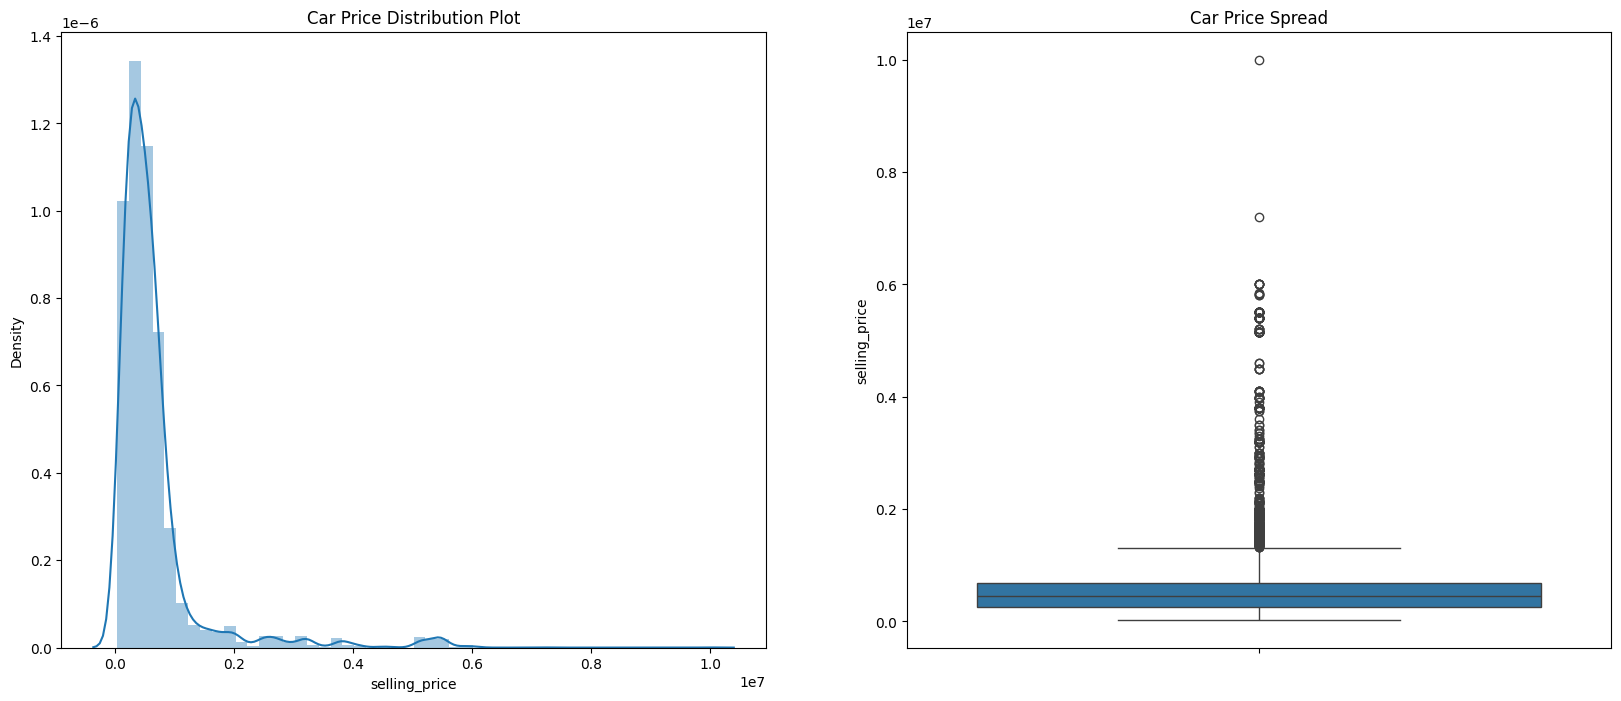

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df['selling_price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df['selling_price'])

plt.show()

## 2.3 Feature Year

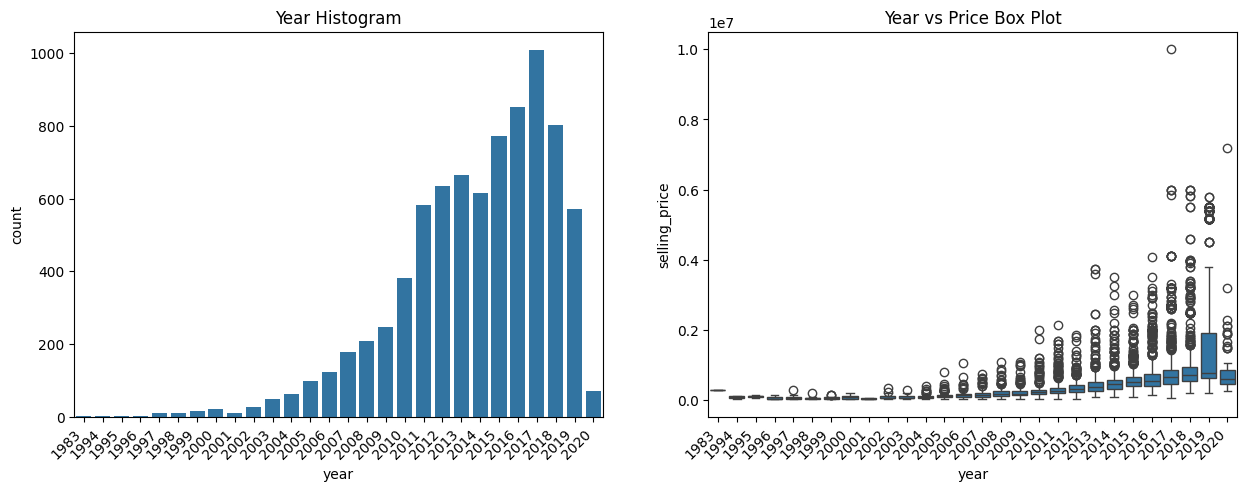

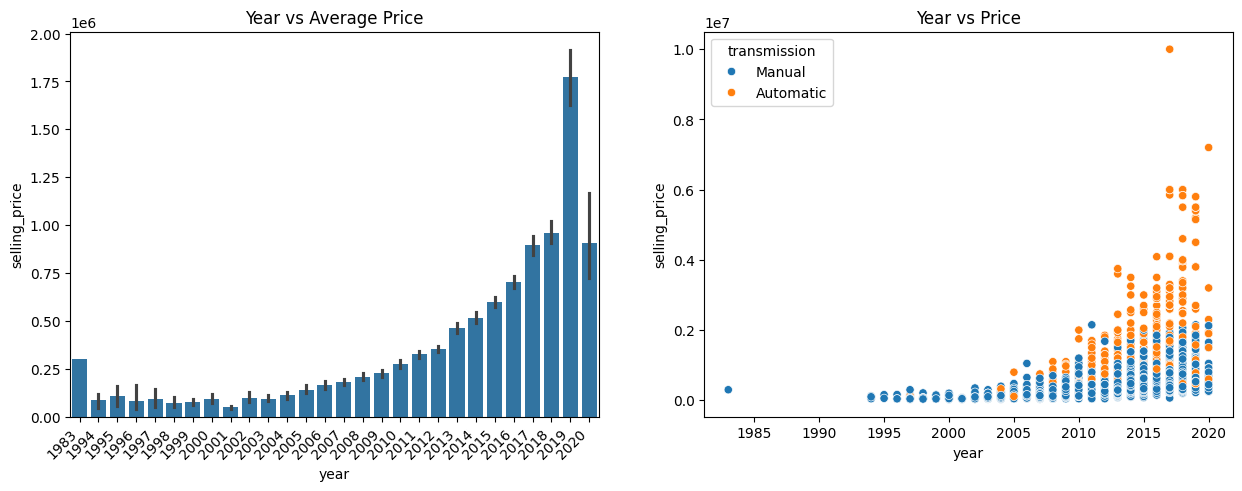

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Year Histogram')
count_plot= sns.countplot(data = df, x = 'year')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Year vs Price Box Plot')
barplot = sns.boxplot(x = df['year'], y = df['selling_price'])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Year vs Average Price')
barplot = sns.barplot(x = df['year'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Year vs Price')
scatterplot = sns.scatterplot(x = df['year'], y = df['selling_price'], hue = df['transmission'])

## 2.4 Feature Brand

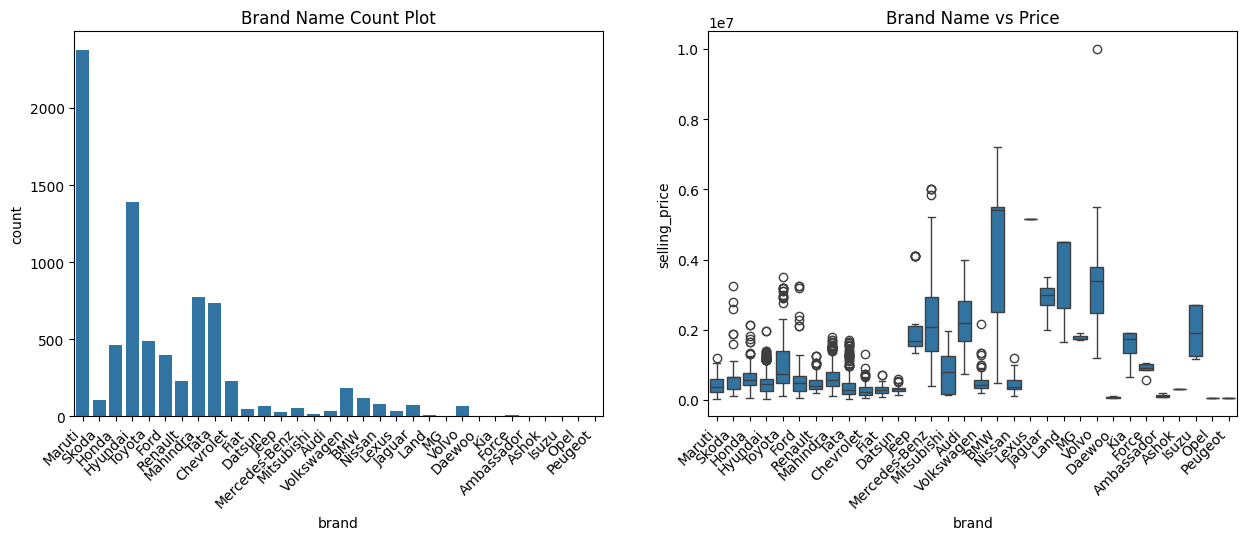

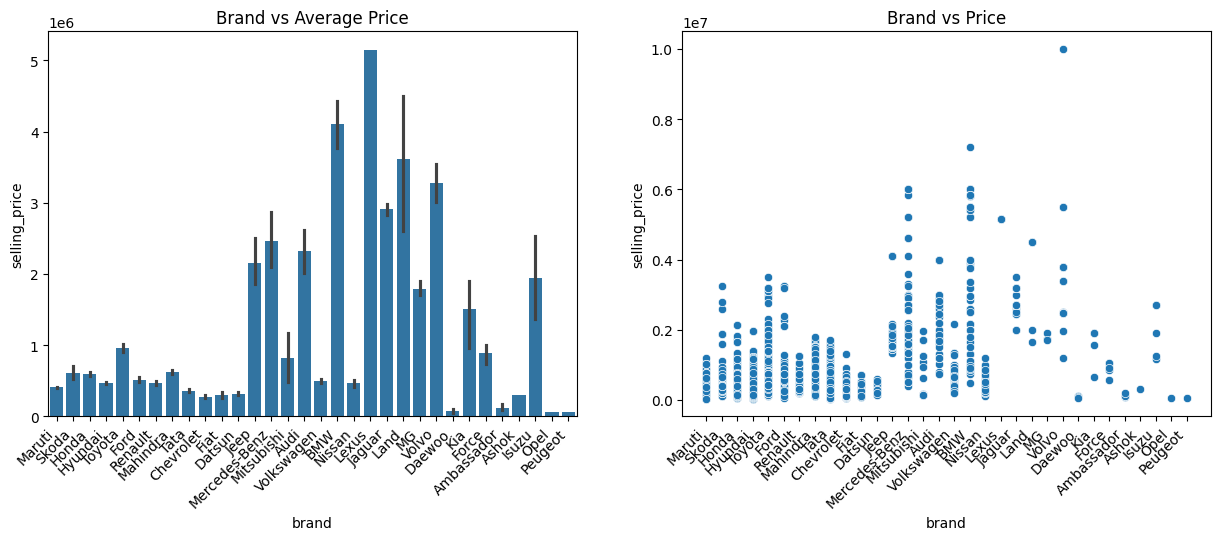

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Brand Name Count Plot')
count_plot= sns.countplot(data = df, x = 'brand')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Brand Name vs Price')
barplot = sns.boxplot(x = df['brand'], y = df['selling_price'])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Brand vs Average Price')
barplot = sns.barplot(x = df['brand'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Brand vs Price')
scatterplot = sns.scatterplot(x = df['brand'], y = df['selling_price'])
scatterplot.set_xticklabels(scatterplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

## 2.5 Feature KM Driven

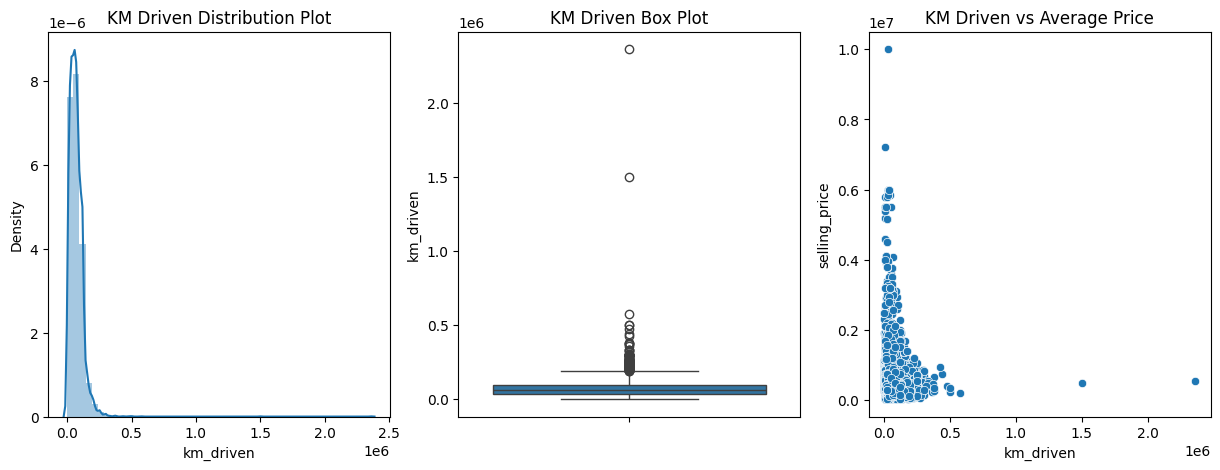

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('KM Driven Distribution Plot')
sns.distplot(df.km_driven)

plt.subplot(1,3,2)
plt.title('KM Driven Box Plot')
sns.boxplot(y=df.km_driven)

plt.subplot(1,3,3)
plt.title('KM Driven vs Average Price')
scatterplot = sns.scatterplot(x = df['km_driven'], y = df['selling_price'])

plt.show()


## 2.6 Feature Fuel

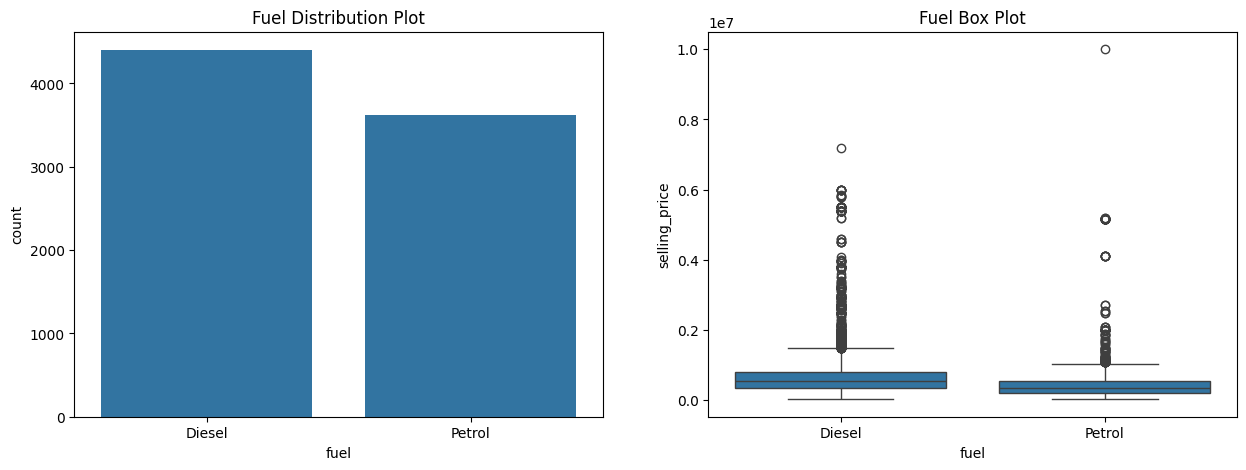

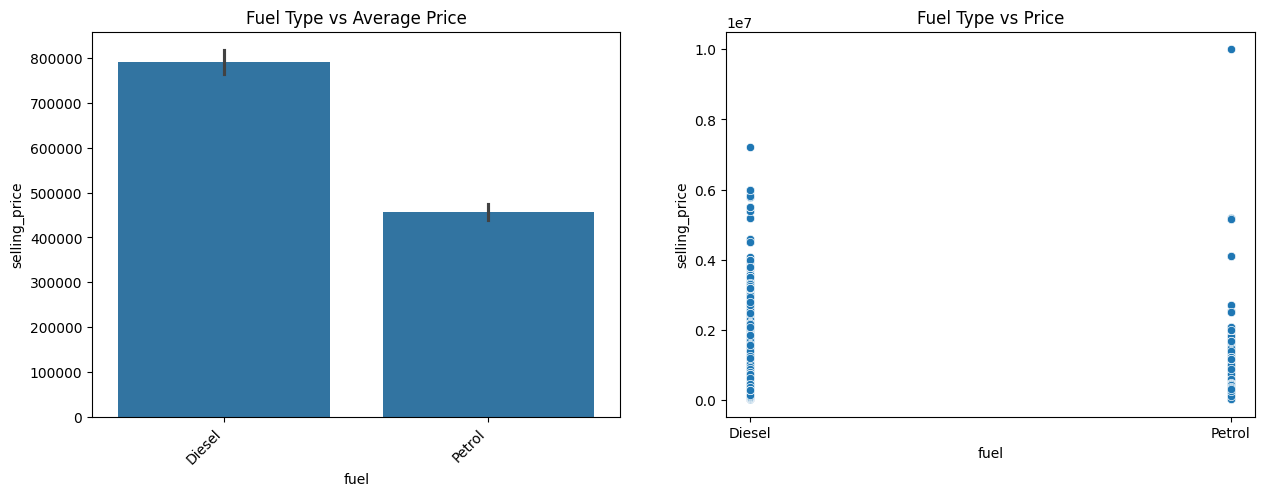

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Fuel Distribution Plot')
count_plot= sns.countplot(data = df, x = 'fuel')

plt.subplot(1,2,2)
plt.title('Fuel Box Plot')
sns.boxplot(x = df['fuel'], y = df['selling_price'])

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Fuel Type vs Average Price')
barplot = sns.barplot(x = df['fuel'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
scatterplot = sns.scatterplot(x = df['fuel'], y = df['selling_price'])

## 2.7 Feature Seller Type

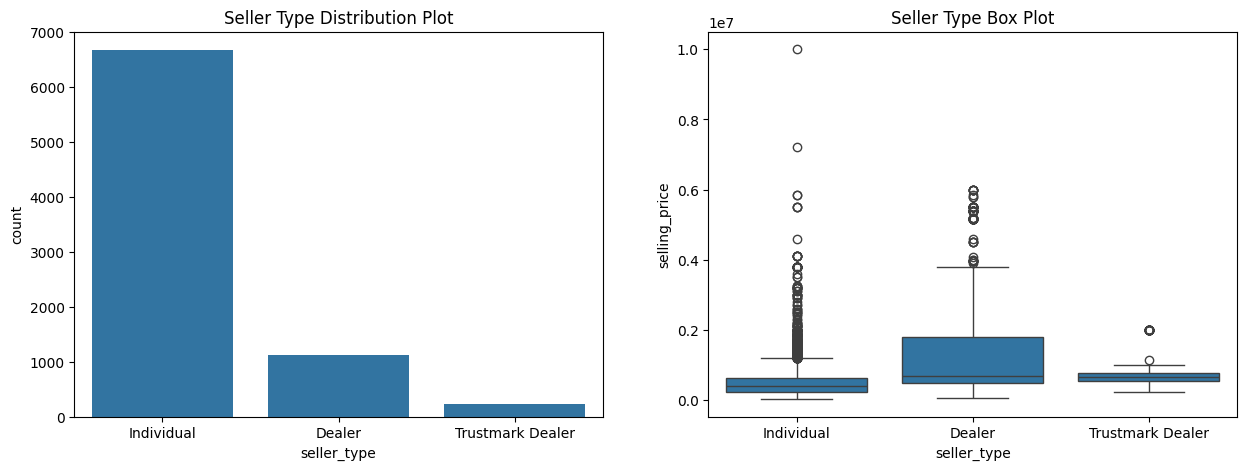

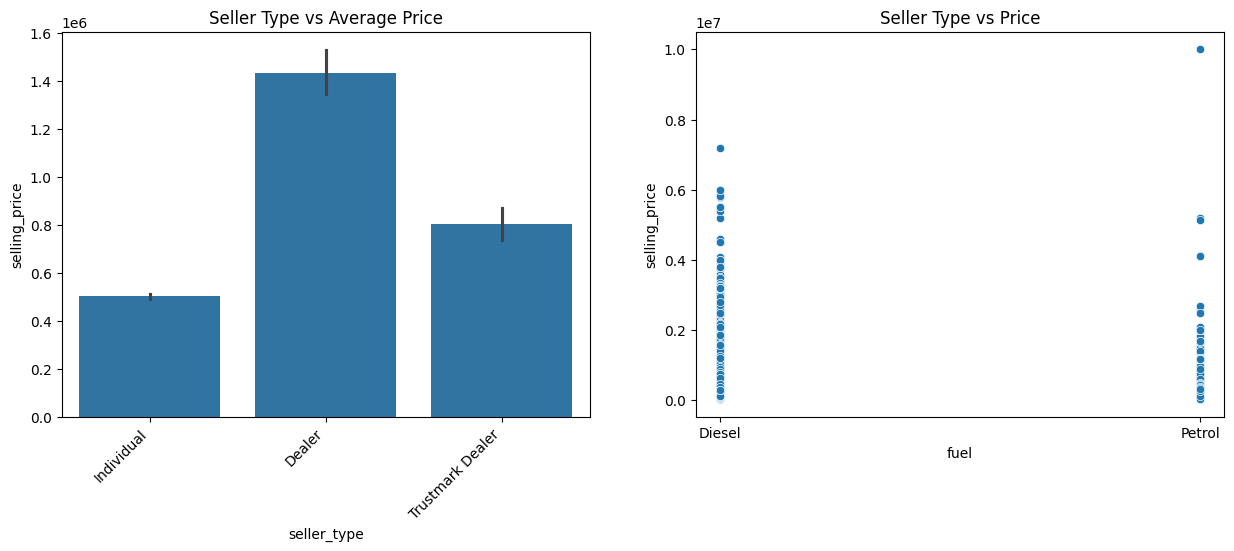

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Seller Type Distribution Plot')
count_plot= sns.countplot(data = df, x = 'seller_type')

plt.subplot(1,2,2)
plt.title('Seller Type Box Plot')
sns.boxplot(x = df['seller_type'], y = df['selling_price'])

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Seller Type vs Average Price')
barplot = sns.barplot(x = df['seller_type'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Seller Type vs Price')
scatterplot = sns.scatterplot(x = df['fuel'], y = df['selling_price'])

## 2.8 Feature Transmission

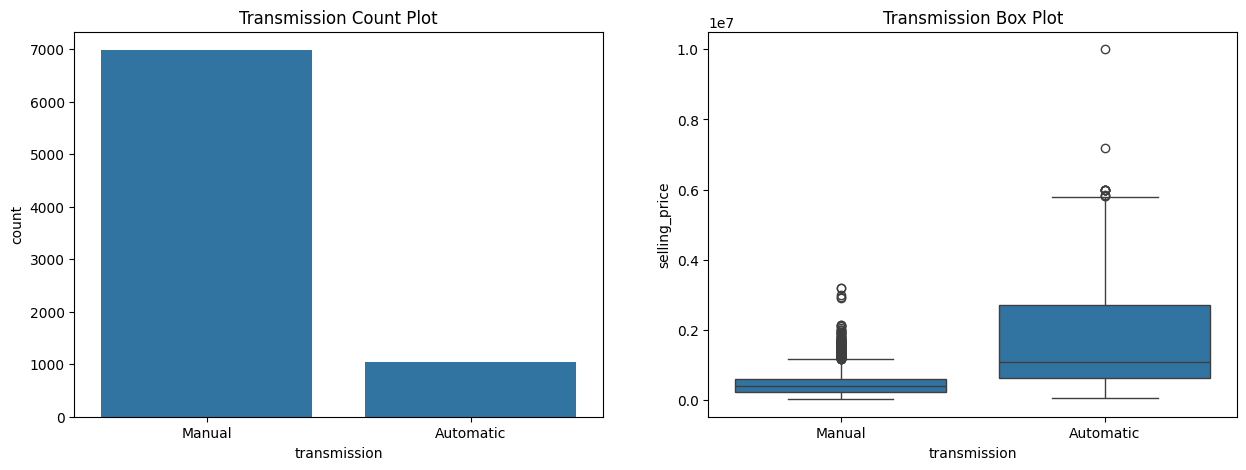

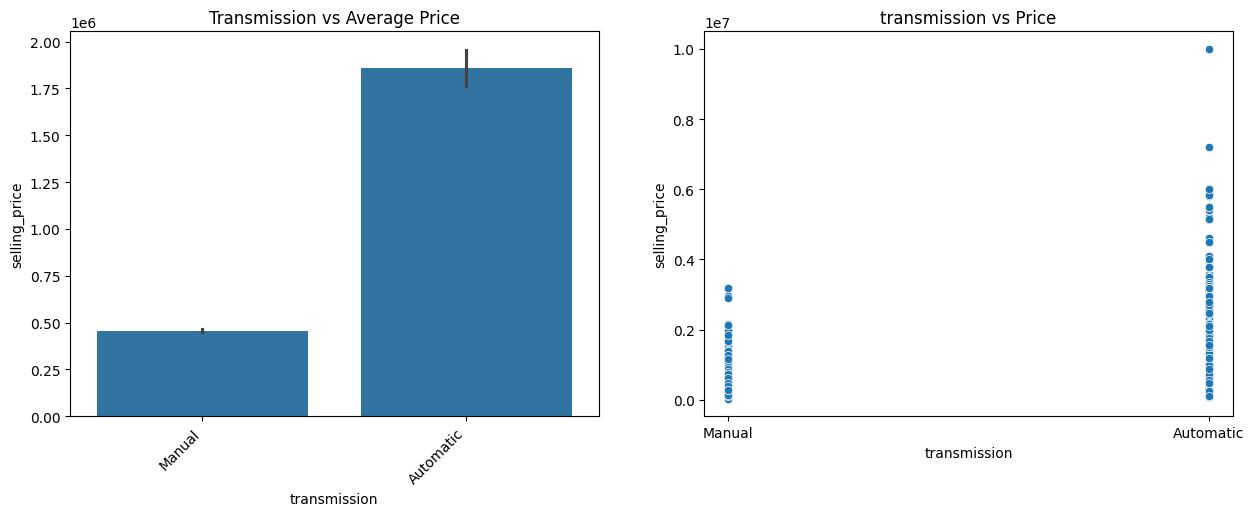

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Transmission Count Plot')
count_plot= sns.countplot(data = df, x = 'transmission')

plt.subplot(1,2,2)
plt.title('Transmission Box Plot')
sns.boxplot(x = df['transmission'], y = df['selling_price'])

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('Transmission vs Average Price')
barplot = sns.barplot(x = df['transmission'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('transmission vs Price')
scatterplot = sns.scatterplot(x = df['transmission'], y = df['selling_price'])

## 2.9 Feature Owner

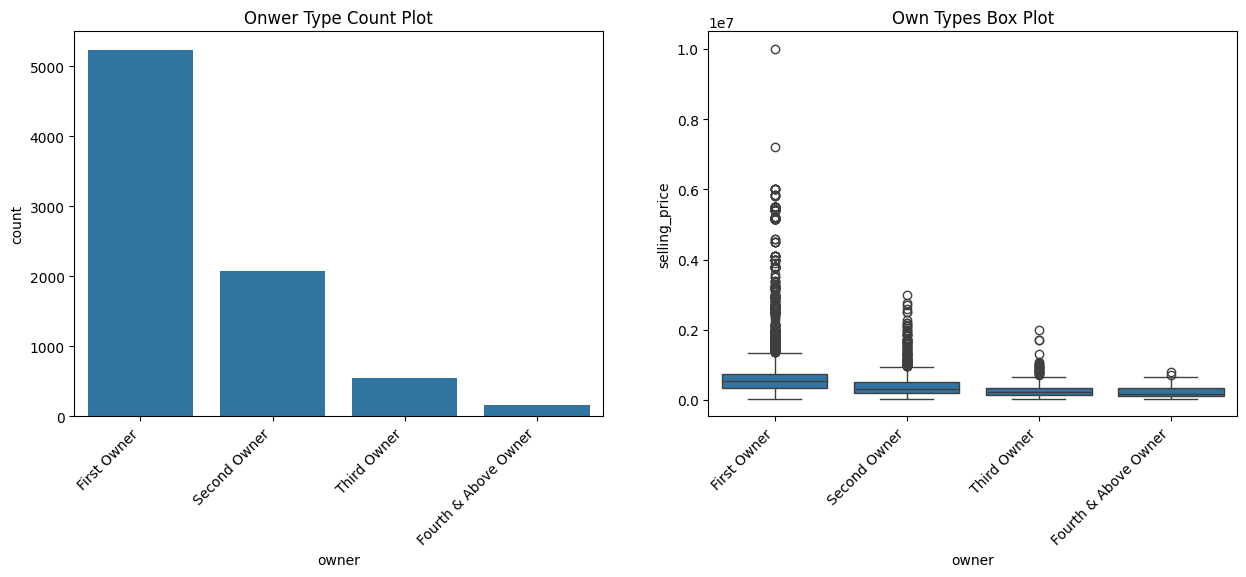

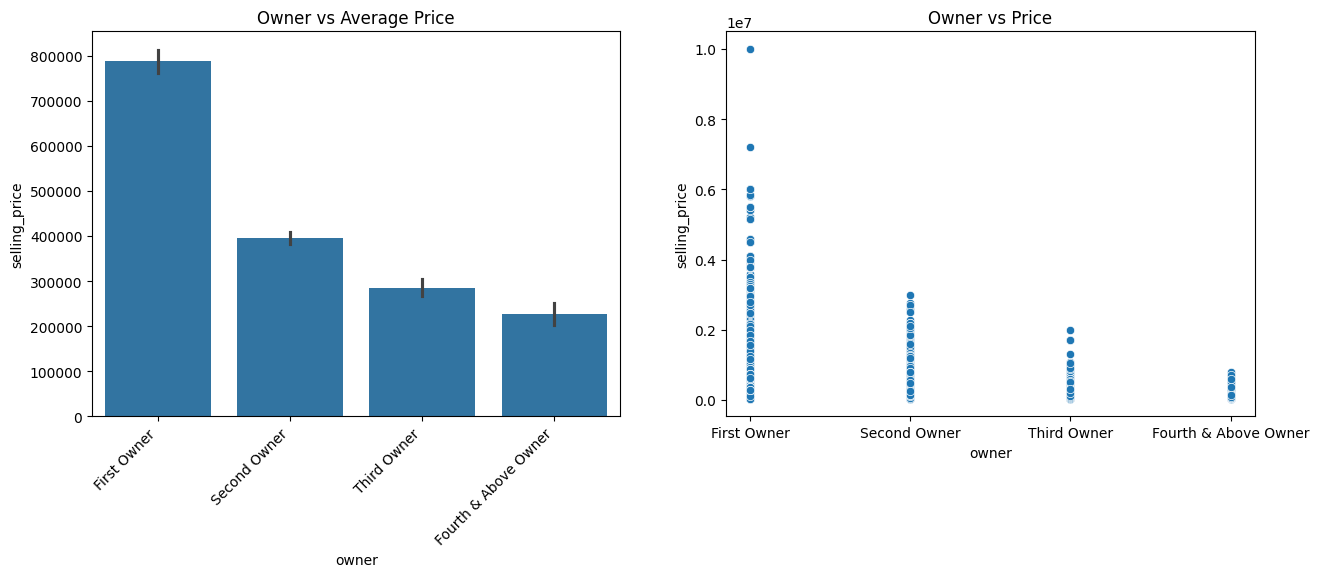

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Onwer Type Count Plot')
count_plot= sns.countplot(data = df, x = 'owner')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Own Types Box Plot')
boxplot = sns.boxplot(x = df['owner'], y = df['selling_price'])
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('Owner vs Average Price')
barplot = sns.barplot(x = df['owner'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Owner vs Price')
scatterplot = sns.scatterplot(x = df['owner'], y = df['selling_price'])

## 2.10 Feature Mileage

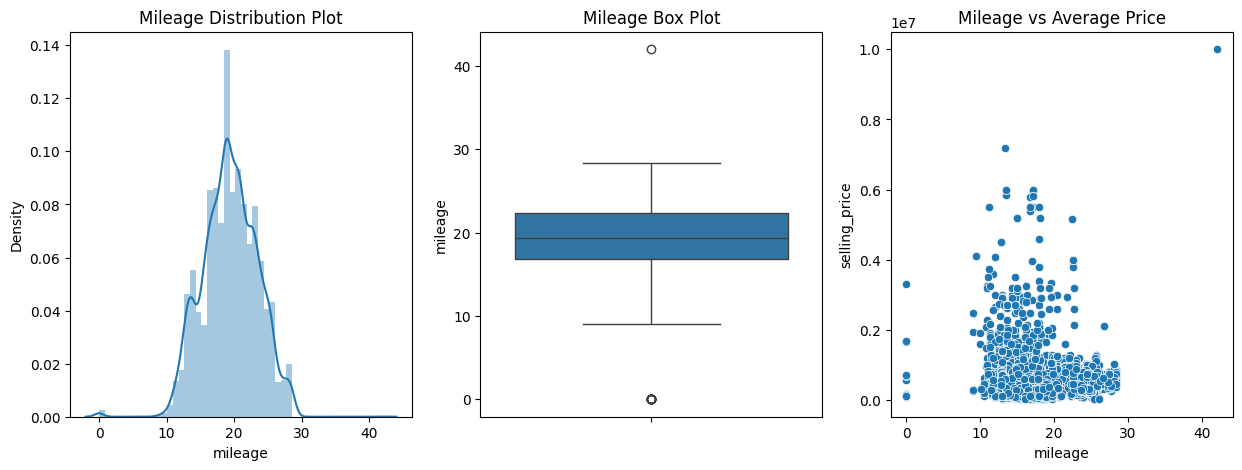

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Mileage Distribution Plot')
sns.distplot(df['mileage'])

plt.subplot(1,3,2)
plt.title('Mileage Box Plot')
sns.boxplot(y=df['mileage'])

plt.subplot(1,3,3)
plt.title('Mileage vs Average Price')
scatterplot = sns.scatterplot(x = df['mileage'], y = df['selling_price'])

plt.show()

## 2.11 Feature Engine

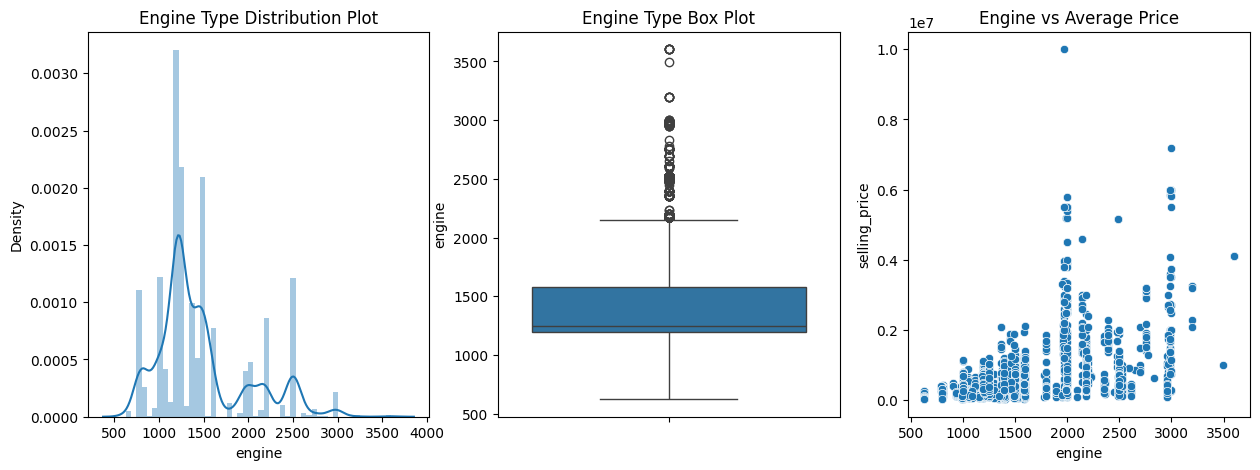

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Engine Type Distribution Plot')
sns.distplot(df['engine'])

plt.subplot(1,3,2)
plt.title('Engine Type Box Plot')
sns.boxplot(y=df['engine'])

plt.subplot(1,3,3)
plt.title('Engine vs Average Price')
scatterplot = sns.scatterplot(x = df['engine'], y = df['selling_price'])

plt.show()

## 2.12 Feature Max Power

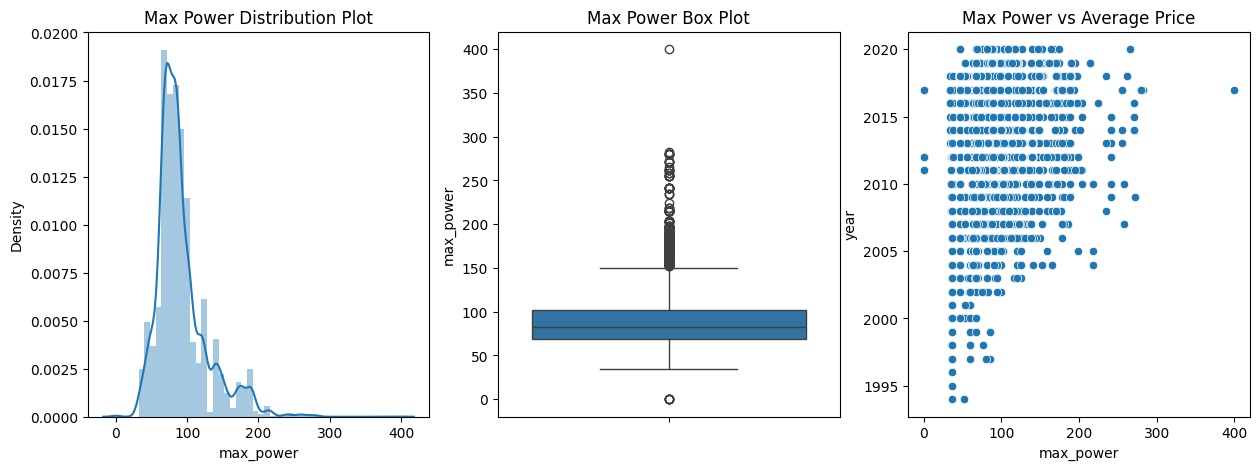

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Max Power Distribution Plot')
sns.distplot(df['max_power'])

plt.subplot(1,3,2)
plt.title('Max Power Box Plot')
sns.boxplot(y=df['max_power'])

plt.subplot(1,3,3)
plt.title('Max Power vs Average Price')
scatterplot = sns.scatterplot(x = df['max_power'], y = df['year'])

plt.show()

## 2.13 Feature Seat

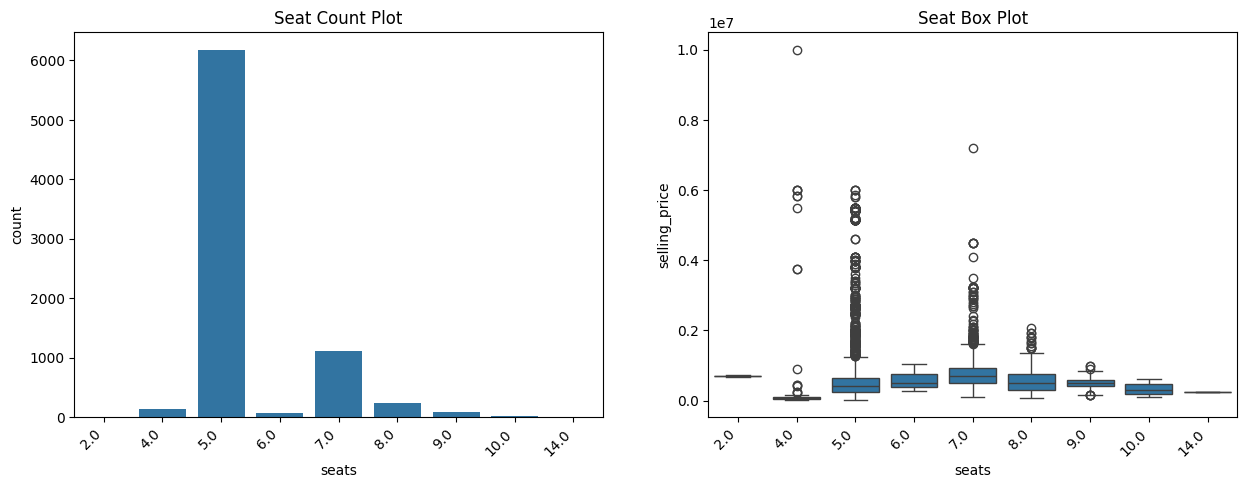

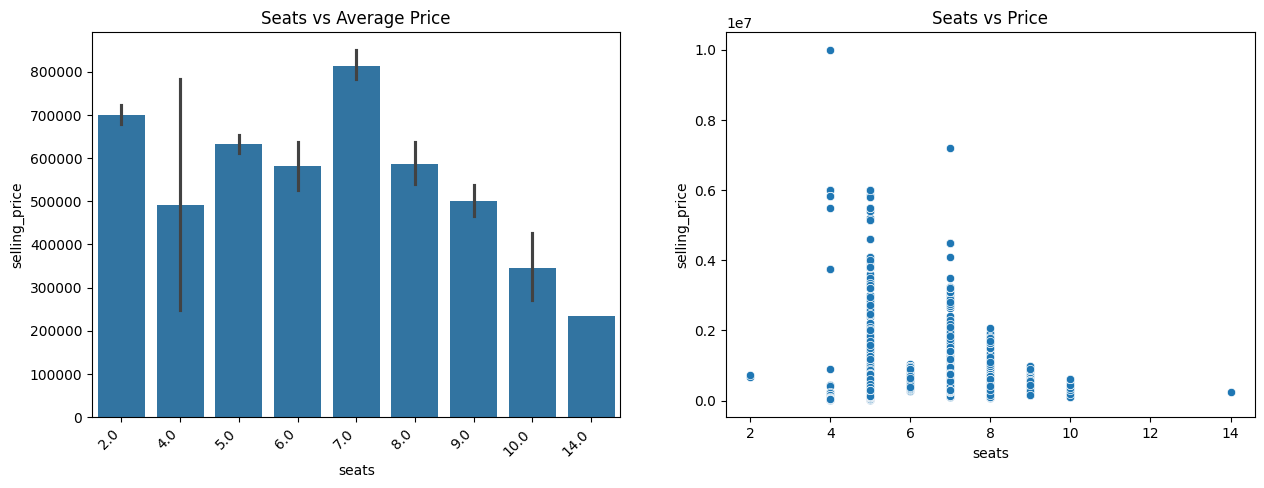

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Seat Count Plot')
count_plot= sns.countplot(data = df, x = 'seats')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Seat Box Plot')
boxplot = sns.boxplot(x = df['seats'], y = df['selling_price'])
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('Seats vs Average Price')
barplot = sns.barplot(x = df['seats'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Seats vs Price')
scatterplot = sns.scatterplot(x = df['seats'], y = df['selling_price'])

## 2.14 Label Encoding

### In this section, I will encode all categorical data.
- brand
- fuel
- seller_type
- transmission
- owner

In [28]:
from sklearn.preprocessing import LabelEncoder

# brand_le = LabelEncoder()
# df["brand"] = brand_le.fit_transform(df["brand"])

In [29]:
df[["brand"]].shape

(8028, 1)

In [30]:
df.reset_index(inplace=True)

In [31]:
from sklearn.preprocessing import OneHotEncoder

# Create function for one-hot encoding a feature in dataframe 
def one_hot_transform(encoder, dataframe, feature):

    encoded = encoder.transform(dataframe[[feature]])

    # Transform encoded data arrays into dataframe where columns are based values
    categories = encoder.categories_[0]
    feature_df = pd.DataFrame(encoded.toarray(), columns=categories[1:])
    concat_dataframe = pd.concat([dataframe, feature_df], axis=1)
    
    return concat_dataframe.drop(feature, axis=1)

In [32]:
# Since 'brand' and 'seller_type' have than two unique values, we should apply one-hot encoding
brand_ohe = OneHotEncoder(drop='first').fit(df[['brand']])
original_df = df.copy()
df = one_hot_transform(brand_ohe, df, 'brand')

In [33]:
df

,index,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8024,8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8025,8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8026,8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
# Excluding one-hot encoded features
selected_cols = ['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
dfcopy = df.copy()
dfcopy = df[selected_cols]

In [35]:
df

,index,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8024,8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8025,8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8026,8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

In [37]:
le = LabelEncoder()
df["seller_type"] = le.fit_transform(df["seller_type"])

In [38]:
le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])

In [39]:
owner_le = LabelEncoder()
df["owner"] = owner_le.fit_transform(df["owner"])

In [40]:
owner_le.classes_

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Third Owner'], dtype=object)

In [41]:
# check the encoded data.
df.head(5)

,index,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,2014,450000,145500,0,1,1,0,23.40,1248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2014,370000,120000,0,1,1,2,21.14,1498.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,2006,158000,140000,1,1,1,3,17.70,1497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2010,225000,127000,0,1,1,0,23.00,1396.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2007,130000,120000,1,1,1,0,16.10,1298.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df.shape

(8028, 43)

## 2.15 Correlation Graph

- In this section, I will use heatmap to check the correlation between features to avoid using the features with strong correlations.

In [43]:
dfcopy.corr(numeric_only=True)

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.415361,-0.417761,0.328817,0.016725,0.226345,-0.007718
selling_price,0.415361,1.000000,-0.224890,-0.124062,0.456359,0.749222,0.041003
km_driven,-0.417761,-0.224890,1.000000,-0.173733,0.209019,-0.036235,0.228646
mileage,0.328817,-0.124062,-0.173733,1.000000,-0.578707,-0.372881,-0.454411
engine,0.016725,0.456359,0.209019,-0.578707,1.000000,0.701834,0.610481
max_power,0.226345,0.749222,-0.036235,-0.372881,0.701834,1.000000,0.189248
seats,-0.007718,0.041003,0.228646,-0.454411,0.610481,0.189248,1.000000


<Axes: >

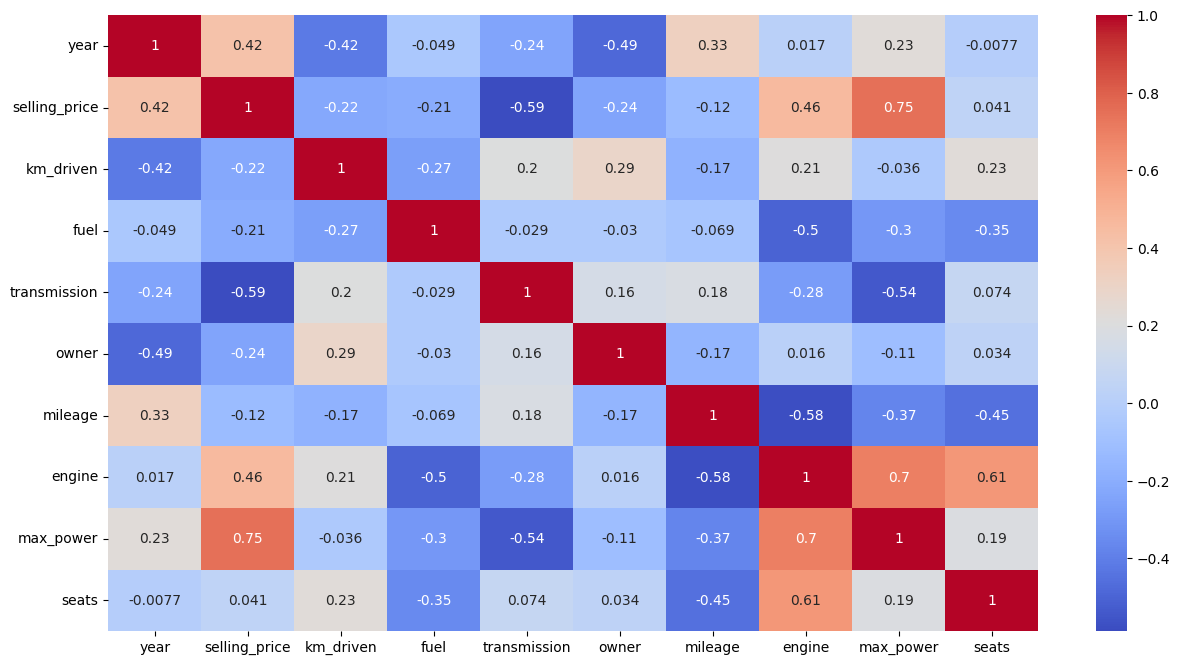

In [44]:
plt.figure(figsize = (15,8))
sns.heatmap(df[selected_cols].corr(numeric_only=True), annot=True, cmap="coolwarm")

### Correlation Analysis
- Engine and max power have strong correlation.
- Engine and seat also have strong correlation.
- Therefore, we should drop the Engine Column.

## Check Predictive Power Score
- I use PPS scores to select some features to train the model.

<Axes: xlabel='x', ylabel='y'>

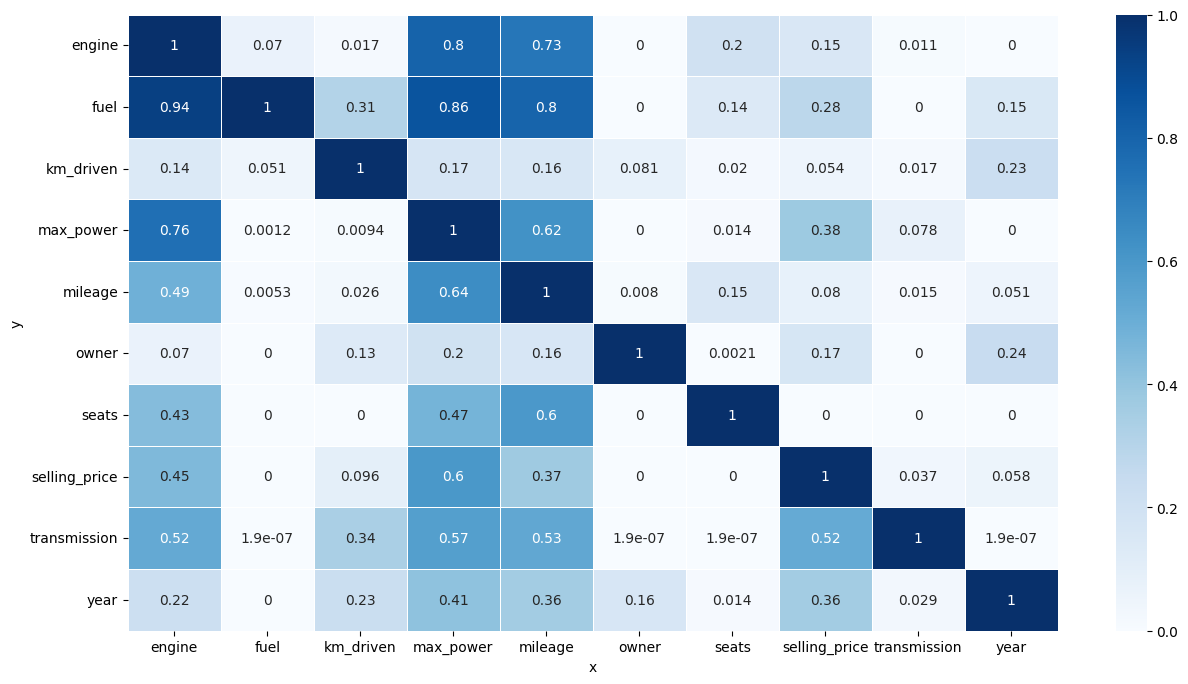

In [45]:
import ppscore as pps

# before using pps, let's drop country and year
temp_df = df.copy()
temp_df.drop(['engine'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

# 4. Feature Selection

Top Features according to PPS
- max_power
- mileage
- brand

Features from EDA
- year

In [46]:
brand_cats = list(brand_ohe.categories_[0][1:])

selected_features = ['max_power', 'mileage', 'year'] + brand_cats
#x is our strong features
X = df[ selected_features ]

#y is simply the life expectancy col
y = df['selling_price']

### Convert selling_price into categorical data

In [47]:
y.shape

(8028,)

In [48]:
# convert continuous y-values into categorical data {0, 1, 2, 3}
# I use pd.qcut to have a balance dataset.
y, c = pd.qcut(y, 4, labels=[0, 1, 2, 3], retbins = True)
y

0       1
1       1
2       0
3       0
4       0
       ..
8023    1
8024    0
8025    1
8026    1
8027    1
Name: selling_price, Length: 8028, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [49]:
c

array([   29999.,   260000.,   450000.,   680000., 10000000.])

<Axes: >

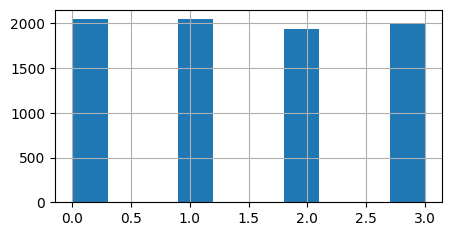

In [50]:
# check the distribution of converted values. To see if there are any imbalance data.
y.hist(figsize=(5, 2.5))

In [51]:
c

array([   29999.,   260000.,   450000.,   680000., 10000000.])

### Split the dataset into training and testing sets.

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

m = X.shape[0]  #number of samples
n = X.shape[1]  #number of features

# 5. Preprocessing

## 5.1 Null Values

In [53]:
#check for null values of training dataset.
X_train[selected_features].isna().sum()

max_power        149
mileage          154
year               0
Ashok              0
Audi               0
BMW                0
Chevrolet          0
Daewoo             0
Datsun             0
Fiat               0
Force              0
Ford               0
Honda              0
Hyundai            0
Isuzu              0
Jaguar             0
Jeep               0
Kia                0
Land               0
Lexus              0
MG                 0
Mahindra           0
Maruti             0
Mercedes-Benz      0
Mitsubishi         0
Nissan             0
Opel               0
Peugeot            0
Renault            0
Skoda              0
Tata               0
Toyota             0
Volkswagen         0
Volvo              0
dtype: int64

In [54]:
#check for null values of training dataset.
X_test[selected_features].isna().sum()

max_power        59
mileage          60
year              0
Ashok             0
Audi              0
BMW               0
Chevrolet         0
Daewoo            0
Datsun            0
Fiat              0
Force             0
Ford              0
Honda             0
Hyundai           0
Isuzu             0
Jaguar            0
Jeep              0
Kia               0
Land              0
Lexus             0
MG                0
Mahindra          0
Maruti            0
Mercedes-Benz     0
Mitsubishi        0
Nissan            0
Opel              0
Peugeot           0
Renault           0
Skoda             0
Tata              0
Toyota            0
Volkswagen        0
Volvo             0
dtype: int64

In [55]:
y_train.isna().sum()

0

In [56]:
y_test.isna().sum()

0

<Axes: title={'center': 'Mileage Distribution Plot'}, xlabel='mileage', ylabel='Density'>

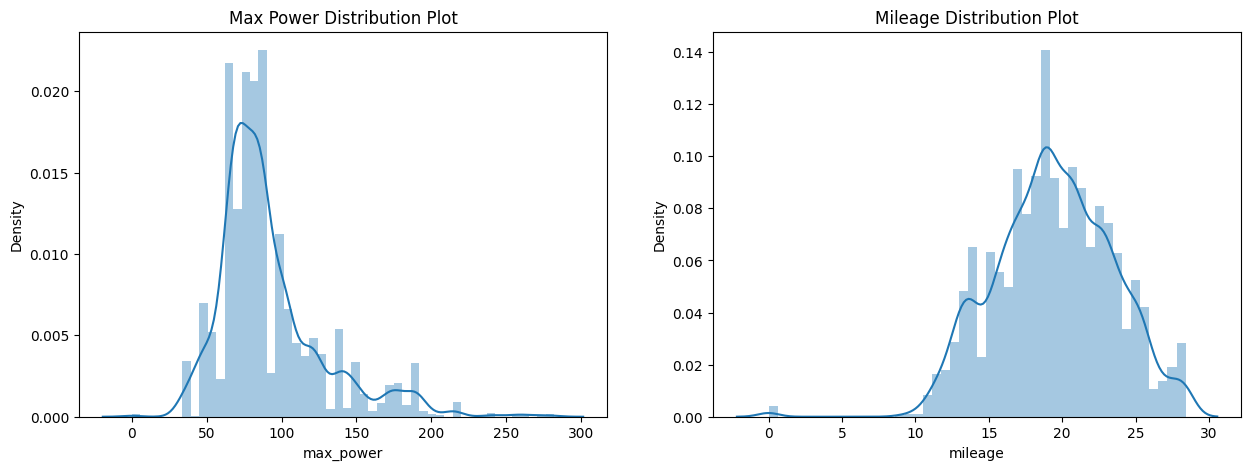

In [57]:
# Check the distribution of max_power and mileage to replace missing values.
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Max Power Distribution Plot')
sns.distplot(X_train['max_power'])

plt.subplot(1,2,2)
plt.title('Mileage Distribution Plot')
sns.distplot(X_train['mileage'])

In [58]:
X_train[['max_power', 'mileage']].describe()

,max_power,mileage
count,5470.000000,5465.000000
mean,92.049350,19.416893
std,35.866965,4.018603
min,0.000000,0.000000
25%,68.070000,16.800000
50%,82.400000,19.330000
75%,103.200000,22.320000
max,282.000000,28.400000


## 5.2 Replacing missing data
- Since Both features is roughly follow normal distribution, so I will use mean value to replace missing values of both features.
- There is no missing data in brand and year features.

In [59]:
# Before replacing missing value. 
# I will save mean and mode data as default values for deployment 
# in case users doesn't have values for all features.

default_values = {
    'max_power': X_train['max_power'].mean(),
    'mileage': X_train['mileage'].mean(),
    'year': X_train['year'].mode()[0]
}

In [60]:
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [61]:
X_test['max_power'].fillna(X_train['max_power'].mean(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [62]:
# check for null values of training dataset again.
X_train[selected_features].isna().sum()

max_power        0
mileage          0
year             0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64

In [63]:
#check for null values of training dataset again.
X_test[selected_features].isna().sum()

max_power        0
mileage          0
year             0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64

## 5.3 Checking Outliers

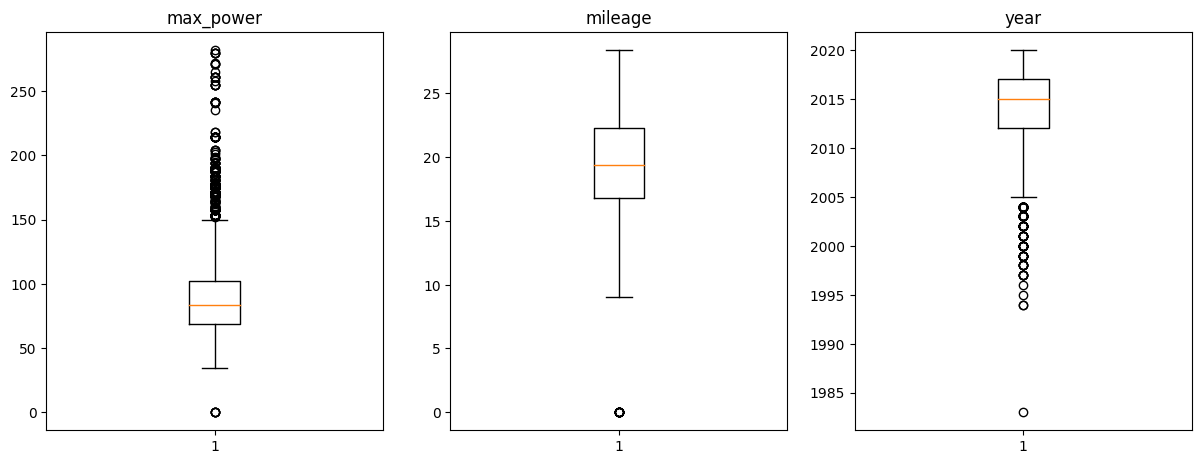

In [64]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'mileage':2,'year':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
    plt.subplot(5,4,i)
    plt.boxplot(X_train[variable])
    plt.title(variable)

plt.show()

In [65]:
# X_train = X_train[['max_power', 'mileage', 'brand']]
# X_test = X_test[['max_power', 'mileage', 'brand']]

In [66]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [67]:
for col in X_train.columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%

---------------year---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%

---------------Ashok---------------

Number of outliers: 1
Percent of data that is outlier: 0.02%

---------------Audi---------------

Number of outliers: 24
Percent of data that is outlier: 0.43%

---------------BMW---------------

Number of outliers: 83
Percent of data that is outlier: 1.48%

---------------Chevrolet---------------

Number of outliers: 152
Percent of data that is outlier: 2.71%

---------------Daewoo---------------

Number of outliers: 3
Percent of data that is outlier: 0.05%

---------------Datsun---------------

Number of outliers: 46
Percent of data that is outlier: 0.82%

---------------Fiat---------------

Number of outliers: 35
Percent of data that is outlier

### Outlier Analysis
Even though there are a lot of outliers, I will not remove them since there is not enough time to inspect each outlier and I don't want to bindly remove all outliers.

## 5.4 Scaling
In this section
- I will use standardization to convert numerical values into similar range to make the training more efficient.

In [68]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
num_features = ['max_power', 'mileage', 'year'];
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features]  = scaler.transform(X_test[num_features])

# also need to scale y here.

In [69]:
X_train.shape

(5619, 34)

#### 'selling_price' is a big number. Therefore, I will scale them using np.log function.

In [70]:
# Also scale the label
# y_train = np.log(y_train)
# y_test = np.log(y_test)
y_train

6765    1
1485    1
7805    2
1272    0
1411    0
       ..
5226    1
5390    1
860     3
7603    3
7270    3
Name: selling_price, Length: 5619, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [71]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 34)
Shape of X_test:  (2409, 34)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [72]:
X.shape

(8028, 34)

In [73]:
# Add intercept values so that we can include bias value in the list of theta.
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [74]:
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [75]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.

mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="st124090-a3")

2025/03/28 00:08:26 INFO mlflow.tracking.fluent: Experiment with name 'st124090-a3' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/426914527460299405', creation_time=1743120863613, experiment_id='426914527460299405', last_update_time=1743120863613, lifecycle_stage='active', name='st124090-a3', tags={}>

In [76]:
class PolynomialFeatures:
    def __init__(self, degree):
        self.degree = degree
    
    def fit_transform(self, X):
        # Transform input features to include polynomial terms
        X_poly = np.column_stack([X ** self.degree])
        return X_poly

# 6. Modeling

In [77]:
import time
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from math import sqrt, isnan

class LogisticRegression:

    def __init__(self, k, n, m, method, init_theta, momentum, alpha, max_iter):
        self.k = k
        self.n = n
        self.m = m
        self.cv = KFold(n_splits=3)
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.init_theta = init_theta
        self.momentum = momentum
        self.prev_step = 0
        
        
    
    def fit(self, X_train, y_train):
        self.kfold_accuracy = list()
        self.kfold_f1 = list()
        self.kfold_recall = list()
        self.kfold_precision = list()

        self.losses = []

        self.n = X_train.shape[1]

        #reset val loss
        self.val_loss_old = np.infty

        start_time = time.time()
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]

            # reset the prev_step for each fold.
            self.prev_step = 0
            
            # initialize theta
            if self.init_theta == 'zero':
                self.W = np.zeros((self.n, self.k))
            else:
                m = X_cross_train.shape[1]
                sqrt_m = sqrt(m)
                lower, upper = -(1 / sqrt_m), (1 / sqrt_m)
                numbers = np.random.uniform(lower, upper, size = (self.n, self.k))
                scaled = lower + numbers * (upper - lower)
                self.W = scaled

            perm = np.random.permutation(X_cross_train.shape[0])
            X_cross_train = X_cross_train[perm]
            y_cross_train = y_cross_train[perm]

            # Batch Gradient Descent
            if self.method == "batch":
                
                for i in range(self.max_iter):
                    loss =  self.gradient(X_cross_train, y_cross_train)
            
            # Minibatch Gradient Descent
            elif self.method == "minibatch":
                start_time = time.time()
                batch_size = int(0.3 * X.shape[0])
                for i in range(self.max_iter):

                    ix = np.random.randint(0, X_cross_train.shape[0]) #<----with replacement
                    batch_X = X_cross_train[ix:ix+batch_size]
                    batch_Y = y_cross_train[ix:ix+batch_size]
                    loss = self.gradient(batch_X, batch_Y)

            # Stochastic Gradient Descent
            elif self.method == "sto":
                list_of_used_ix = [] # without replacement

                for i in range(self.max_iter):
                    idx = np.random.randint(X_cross_train.shape[0])
                    while i in list_of_used_ix:
                        idx = np.random.randint(X_cross_train.shape[0])

                    sto_x = X_cross_train[idx, :].reshape(1, -1)
                    sto_y = y_cross_train[idx]
                    loss = self.gradient(sto_x, sto_y)
                    
                    list_of_used_ix.append(i)
                    if len(list_of_used_ix) == X.shape[0]:
                        list_of_used_ix = []

            else:
                raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')

            # Compute some matrics to measure current model's performance
            yhat_val = self.predict(X_cross_val)
            ytrue_val = self._decodeY(y_cross_val)
            val_f1 = self.weighted_f1(ytrue_val, yhat_val)
            val_accuracy = self.accuracy(ytrue_val, yhat_val)

            self.kfold_accuracy.append(val_accuracy)
            self.kfold_f1.append(val_f1)
        
        print(f"Time taken: {time.time() - start_time}")

        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y

        grad = self.softmax_grad(X, error)
        
        step = self.alpha * grad + self.regularization.derivation(self.W)
        step += self.momentum * self.prev_step

        self.W -= step
        self.prev_step = step

        return loss

    def softmax(self, theta_t_x):

        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''

        prediction = self.softmax(X @ W)
        return prediction
    
    def getThetas(self):
        return self.W
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def avgKfoldAccuracy(self):
        return np.sum(np.array(self.kfold_accuracy)) / len(self.kfold_accuracy)
    
    def avgKfoldf1(self):
        return np.sum(np.array(self.kfold_f1)) / len(self.kfold_f1)

    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
    
    def accuracy(self, ytrue, yhat):    
        match = yhat == ytrue
        return match.sum() / match.value_counts().sum()
    
    # decode one hot array into integers.
    def _decodeY(self, y):
        return pd.Series(np.argmax(y, axis=1))
    
    # encode y label into one hot array.
    def _encodeY(self, y):
        m = y.shape[0]
        k = self.k
        
        if y.ndim == 2:
            return y
        
        encodedY = np.zeros((m, k))
        for each_class in range(k):
            cond = (y == each_class)
            encodedY[np.where(cond), each_class] = 1
        
        return encodedY
    
    def precision(self, ytrue, yhat):
        TP, _, FP = self.confusion_matrix(ytrue, yhat)
        precision = TP / (TP + FP)
        return precision
    
    def recall(self, ytrue, yhat):
        TP, FN, _ = self.confusion_matrix(ytrue, yhat)
        recall = TP / (TP + FN)
        return recall
    
    def f1(self, ytrue, yhat):
        precision = self.precision(ytrue, yhat)
        recall = self.recall(ytrue, yhat)
        
        f1 = (2 * precision * recall) / (precision + recall)
        return f1
    
    def macro_precision(self, ytrue, yhat):
        precision = self.precision(ytrue, yhat)
        return np.mean(precision)
    
    def macro_recall(self, ytrue, yhat):
        recall = self.recall(ytrue, yhat)
        return np.mean(recall)
    
    def macro_f1(self, ytrue, yhat):
        f1 = self.f1(ytrue, yhat)
        return np.mean(f1)
    
    def weighted_precision(self, ytrue, yhat):
        precision = self.precision(ytrue, yhat)
        weights = ytrue.value_counts().sort_index() / ytrue.value_counts().sum()
        return (precision * weights).sum()
    
    def weighted_recall(self, ytrue, yhat):
        recall = self.recall(ytrue, yhat)
        weights = ytrue.value_counts().sort_index() / ytrue.value_counts().sum()
        return (recall * weights).sum()
    
    def weighted_f1(self, ytrue, yhat):
        f1 = self.f1(ytrue, yhat)
        weights = ytrue.value_counts().sort_index() / ytrue.value_counts().sum()
        return (f1 * weights).sum()
    
    def support(self, ytrue):
        return ytrue.value_counts().sort_index().values
    
    # Compute TP, FP and FN rates for each class.
    def confusion_matrix(self, ytrue, yhat):
        
        Y_true_encoded = self._encodeY(ytrue)
        Y_hat_encoded = self._encodeY(yhat)
        confusion_matrix = (Y_true_encoded.T @ Y_hat_encoded).astype('int64')
        
        TP = []
        FN = []
        FP = []
        
        for c in range(k):
            TP_c = confusion_matrix[c][c]
            TP.append(TP_c)
            
            FN_c = confusion_matrix[c].sum() - TP_c
            FN.append(FN_c)
            
            FP_c = confusion_matrix[:, c].sum() - TP_c
            FP.append(FP_c)
        
        TP = np.array(TP)
        FN = np.array(FN)
        FP = np.array(FP)
        
        
        return (TP, FN, FP)
    
    def classification_report(self, ytrue, yhat):
        accuracy = self.accuracy(ytrue, yhat).round(2)
        precision = self.precision(ytrue, yhat).round(2)
        recall = self.recall(ytrue, yhat).round(2)
        f1 = self.f1(ytrue, yhat).round(2)
        support = self.support(ytrue).round(2)
        
        macro_precision = self.macro_precision(ytrue, yhat).round(2)
        macro_recall = self.macro_recall(ytrue, yhat).round(2)
        macro_f1 = self.macro_f1(ytrue, yhat).round(2)
        
        weighted_precision = self.weighted_precision(ytrue, yhat).round(2)
        weighted_recall = self.weighted_recall(ytrue, yhat).round(2)
        weighted_f1 = self.weighted_f1(ytrue, yhat).round(2)
    
        print("Report\t\t", "precision\t", "recall\t\t", "f1-score\t", "support\n")
        for c in range(k):
            print(c, "\t\t", precision[c], "\t\t", recall[c], "\t\t", f1[c], "\t\t", support[c])
        
        print()
        print('accuracy\t\t\t\t\t', accuracy, '\t\t', str(ytrue.shape[0]))
        print("macro avg\t " + str(macro_precision) + "\t\t " + str(macro_recall) + "\t\t " + str(macro_f1) + "\t\t " + str(ytrue.shape[0]))
        print("weighted avg\t " + str(weighted_precision) + "\t\t " + str(weighted_recall) + "\t\t " + str(weighted_f1) + "\t\t " + str(ytrue.shape[0]))
        

In [78]:
class NoRegularization:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, theta): # return 0, since we won't have any regularization.
        return 0

class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
        
class Normal(LogisticRegression):
    
    def __init__(self, k, n, m, method, init_theta, momentum, alpha, max_iter, l = 0.001):
        self.regularization = NoRegularization(l)
        super().__init__(k, n, m, method, init_theta, momentum,  alpha, max_iter)
        
class Ridge(LogisticRegression):
    
    def __init__(self, k, n, m, method, init_theta, momentum, alpha, max_iter, l = 0.001):
        self.regularization = RidgePenalty(l)
        super().__init__(k, n, m, method, init_theta, momentum, alpha, max_iter)

In [79]:
import math

# Define possible hyper parameters
regs = ["Normal", "Ridge"]
momentums = [0, 0.4]
grads = ['sto', 'minibatch', 'batch']
init_thetas = ['zero', 'xavier']
alphas = [0.01, 0.001, 0.0001]

In [80]:
# helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [81]:
X_train.shape

(5619, 35)

In [82]:
# from sklearn.preprocessing import PolynomialFeatures

m = X_train.shape[0]
n = X_train.shape[1]

# Try all possible combination of the defined hyperparameters.
for reg in regs:
    for momentum in momentums:
        for grad in grads:
            for init_theta in init_thetas:
                for alpha in alphas:

                    mlflow_params = {"reg": reg,
                                    "momentum": momentum, 
                                    "method": grad,
                                    "init_theta": init_theta,
                                    "alpha": alpha }
                    
                    current_run = f"reg-{reg}-momemtum{momentum}-method-{grad}-theta-{init_theta}-alpha-{alpha}"
                    mlflow.start_run(run_name=current_run, nested=True)
                    mlflow.log_params(params=mlflow_params)
                    
                    print(current_run)
                    params = {"k": k, "n": n, "m": m, "method": grad, "init_theta": init_theta, "momentum": momentum, "alpha": alpha, "max_iter": 50}

                    type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                    model = type_of_regression(**params)

                    model.fit(X_train, Y_train_encoded)
                    
                    print('Average Accuracy:', model.avgKfoldAccuracy())
                    print('Average f1:', model.avgKfoldf1())

                    # Record metric of current model to MLflow
                    mlflow.log_metric(key="cv_accuracy", value = model.avgKfoldAccuracy())
                    mlflow.log_metric(key="cv_f1", value = model.avgKfoldAccuracy())
                    
                    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        
                    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                    # #######
                    mlflow.end_run()

reg-Normal-momemtum0-method-sto-theta-zero-alpha-0.01
Time taken: 0.05300569534301758
Average Accuracy: 0.5205552589428724
Average f1: 0.44546571114525274


2025/03/28 00:08:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-sto-theta-zero-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/1a8dd2087e1445929a5344ff3348ba3b.
2025/03/28 00:08:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-sto-theta-zero-alpha-0.001
Time taken: 0.10580873489379883
Average Accuracy: 0.5618437444385121
Average f1: 0.538394541332225


2025/03/28 00:08:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-sto-theta-zero-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/2b85f8c30bc340a59c3ea56299fdbfb8.
2025/03/28 00:08:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-sto-theta-zero-alpha-0.0001
Time taken: 0.04374885559082031
Average Accuracy: 0.4903007652607226
Average f1: 0.4225290776360051


2025/03/28 00:09:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-sto-theta-zero-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/79f04d2092a94e52a3b9b742b5ce5700.
2025/03/28 00:09:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-sto-theta-xavier-alpha-0.01
Time taken: 0.04221200942993164
Average Accuracy: 0.5027584979533725
Average f1: 0.4559018911424171


2025/03/28 00:09:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-sto-theta-xavier-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/f3e11cdcee7d4584b79caee7b022023e.
2025/03/28 00:09:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-sto-theta-xavier-alpha-0.001
Time taken: 0.06492304801940918
Average Accuracy: 0.3441893575369283
Average f1: 0.28890999885101826


2025/03/28 00:09:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-sto-theta-xavier-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/d84c79f884f64902807f712119db5850.
2025/03/28 00:09:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-sto-theta-xavier-alpha-0.0001
Time taken: 0.05956006050109863
Average Accuracy: 0.3219434063000534
Average f1: 0.27131646270017823


2025/03/28 00:09:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-sto-theta-xavier-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/3f3fdd6187e443979266153dba292b35.
2025/03/28 00:09:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-minibatch-theta-zero-alpha-0.01
Time taken: 0.05518698692321777
Average Accuracy: 0.581776116746752
Average f1: 0.5501040141123889


2025/03/28 00:09:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-minibatch-theta-zero-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/3059dfb826e04e8886fc85b9cd74d402.
2025/03/28 00:09:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-minibatch-theta-zero-alpha-0.001
Time taken: 0.11135339736938477
Average Accuracy: 0.6599038974906567
Average f1: 0.6601295429885535


2025/03/28 00:09:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-minibatch-theta-zero-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/186ee25371774abab1ea55396dea4213.
2025/03/28 00:09:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-minibatch-theta-zero-alpha-0.0001
Time taken: 0.050096750259399414
Average Accuracy: 0.600640683395622
Average f1: 0.5791143464273203


2025/03/28 00:10:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-minibatch-theta-zero-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/efe6d8ab52c84f1c9e7d9bfaaf2f5145.
2025/03/28 00:10:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-minibatch-theta-xavier-alpha-0.01
Time taken: 0.04300665855407715
Average Accuracy: 0.5474283680370172
Average f1: 0.516872968994142


2025/03/28 00:10:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-minibatch-theta-xavier-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/1ec7173e69e24ae6b5faa81d2afa01b3.
2025/03/28 00:10:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-minibatch-theta-xavier-alpha-0.001
Time taken: 0.04207158088684082
Average Accuracy: 0.6629293468588716
Average f1: 0.6635451914397973


2025/03/28 00:10:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-minibatch-theta-xavier-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/eedd95b546714ac68665e035aa39ffa6.
2025/03/28 00:10:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-minibatch-theta-xavier-alpha-0.0001
Time taken: 0.04105401039123535
Average Accuracy: 0.599572877736252
Average f1: 0.5794894077357012


2025/03/28 00:10:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-minibatch-theta-xavier-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/09351ca008164511aea58bc092bb36c0.
2025/03/28 00:10:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-batch-theta-zero-alpha-0.01
Time taken: 0.30857348442077637
Average Accuracy: 0.568962448834312
Average f1: 0.5415642678836367


2025/03/28 00:10:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-batch-theta-zero-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/d309b1bb62b94018b4be00d65a5bd4b2.
2025/03/28 00:10:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-batch-theta-zero-alpha-0.001
Time taken: 0.2857804298400879
Average Accuracy: 0.6707599216942516
Average f1: 0.6719297913694754


2025/03/28 00:10:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-batch-theta-zero-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/24d237aacdd246cd87d3867510bdb2a2.
2025/03/28 00:10:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-batch-theta-zero-alpha-0.0001
Time taken: 0.2973487377166748
Average Accuracy: 0.6239544402918669
Average f1: 0.6165228174431903


2025/03/28 00:11:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-batch-theta-zero-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/c6b6a8495c92455ea438ced342c4b995.
2025/03/28 00:11:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-batch-theta-xavier-alpha-0.01
Time taken: 0.363419771194458
Average Accuracy: 0.5605979711692471
Average f1: 0.5176012510019274


2025/03/28 00:11:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-batch-theta-xavier-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/36bde9318eac4877bab1fcb7c1f20bec.
2025/03/28 00:11:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-batch-theta-xavier-alpha-0.001
Time taken: 0.3148014545440674
Average Accuracy: 0.6705819540843567
Average f1: 0.6717625409419196


2025/03/28 00:11:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-batch-theta-xavier-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/3d753386549541a797e58660aaac442e.
2025/03/28 00:11:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0-method-batch-theta-xavier-alpha-0.0001
Time taken: 0.28031253814697266
Average Accuracy: 0.6248442783413419
Average f1: 0.6179192338747319


2025/03/28 00:11:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0-method-batch-theta-xavier-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/9bc5104fc32b47ab89bf3e6c5a03acb4.
2025/03/28 00:11:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-sto-theta-zero-alpha-0.01
Time taken: 0.037016868591308594
Average Accuracy: 0.5435130806193272
Average f1: 0.46674297417644556


2025/03/28 00:11:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-sto-theta-zero-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/b03cf4c87b7440fd9cc403f8352a30b9.
2025/03/28 00:11:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-sto-theta-zero-alpha-0.001
Time taken: 0.04384136199951172
Average Accuracy: 0.5216230646022423
Average f1: 0.43573520935127164


2025/03/28 00:11:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-sto-theta-zero-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/f03df36ea6754685b403747f59994629.
2025/03/28 00:11:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-sto-theta-zero-alpha-0.0001
Time taken: 0.038031816482543945
Average Accuracy: 0.5346147001245773
Average f1: 0.4742727103972774


2025/03/28 00:11:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-sto-theta-zero-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/6eb7d1195f964e08a0b682a5f5dffea1.
2025/03/28 00:11:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-sto-theta-xavier-alpha-0.01
Time taken: 0.06046485900878906
Average Accuracy: 0.5234027407011924
Average f1: 0.4451322483378359


2025/03/28 00:11:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-sto-theta-xavier-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/6b85c6340995465e8968febd0f366859.
2025/03/28 00:11:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-sto-theta-xavier-alpha-0.001
Time taken: 0.05489373207092285
Average Accuracy: 0.38707955152162304
Average f1: 0.3604360472096822


2025/03/28 00:12:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-sto-theta-xavier-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/29a0cf68392e4c0a8570aee05ec1a7d1.
2025/03/28 00:12:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-sto-theta-xavier-alpha-0.0001
Time taken: 0.0326838493347168
Average Accuracy: 0.21925609539063892
Average f1: 0.1813898391053629


2025/03/28 00:12:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-sto-theta-xavier-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/584f14d852024e5cafc049500dd73ac0.
2025/03/28 00:12:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-minibatch-theta-zero-alpha-0.01
Time taken: 0.03900647163391113
Average Accuracy: 0.616301833066382
Average f1: 0.6211080638903489


2025/03/28 00:12:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-minibatch-theta-zero-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/2f36af61e22e453fbb3a0e1f0c168b76.
2025/03/28 00:12:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-minibatch-theta-zero-alpha-0.001
Time taken: 0.039998769760131836
Average Accuracy: 0.6657768286171916
Average f1: 0.6656763287961261


2025/03/28 00:12:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-minibatch-theta-zero-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/20adad001ecb4a6ab87c105e16fef3d9.
2025/03/28 00:12:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-minibatch-theta-zero-alpha-0.0001
Time taken: 0.07346773147583008
Average Accuracy: 0.6191493148247019
Average f1: 0.6069691161749274


2025/03/28 00:12:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-minibatch-theta-zero-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/d4ddebe570cf4b998e97f5c0030a56a9.
2025/03/28 00:12:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-minibatch-theta-xavier-alpha-0.01
Time taken: 0.04770350456237793
Average Accuracy: 0.5621996796583022
Average f1: 0.5488039696519041


2025/03/28 00:12:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-minibatch-theta-xavier-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/e143b8f8a07446cabf2484b1b2c73414.
2025/03/28 00:12:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-minibatch-theta-xavier-alpha-0.001
Time taken: 0.04467463493347168
Average Accuracy: 0.6647090229578216
Average f1: 0.6653947453617725


2025/03/28 00:12:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-minibatch-theta-xavier-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/36f9a41270154a66bab7c3f1e9a476ff.
2025/03/28 00:12:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-minibatch-theta-xavier-alpha-0.0001
Time taken: 0.04505157470703125
Average Accuracy: 0.6196832176543868
Average f1: 0.609865134621116


2025/03/28 00:13:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-minibatch-theta-xavier-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/47e7b4df5f394a77b0dde97d245a5cc0.
2025/03/28 00:13:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-batch-theta-zero-alpha-0.01
Time taken: 0.3128335475921631
Average Accuracy: 0.590674497241502
Average f1: 0.5497341083642547


2025/03/28 00:13:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-batch-theta-zero-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/97d70d0a053942c8972bb428007897cd.
2025/03/28 00:13:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-batch-theta-zero-alpha-0.001
Time taken: 0.30129146575927734
Average Accuracy: 0.6759209823812067
Average f1: 0.677471109593187


2025/03/28 00:13:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-batch-theta-zero-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/66491566cd0049e2a5d246d04a2654b7.
2025/03/28 00:13:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-batch-theta-zero-alpha-0.0001
Time taken: 0.3135862350463867
Average Accuracy: 0.6444207154297917
Average f1: 0.641779782033383


2025/03/28 00:13:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-batch-theta-zero-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/46f005a51aa145189f05fd10ff81b110.
2025/03/28 00:13:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-batch-theta-xavier-alpha-0.01
Time taken: 0.5384957790374756
Average Accuracy: 0.604911906033102
Average f1: 0.5643048104040327


2025/03/28 00:13:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-batch-theta-xavier-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/b5d7e185de85441b9614b65db5e7a07a.
2025/03/28 00:13:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-batch-theta-xavier-alpha-0.001
Time taken: 0.30474209785461426
Average Accuracy: 0.6750311443317316
Average f1: 0.6767282290001532


2025/03/28 00:13:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-batch-theta-xavier-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/3269836ddcac4d8a9738baa25382a88e.
2025/03/28 00:13:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Normal-momemtum0.4-method-batch-theta-xavier-alpha-0.0001
Time taken: 0.37317800521850586
Average Accuracy: 0.6485139704573767
Average f1: 0.646249559121378


2025/03/28 00:13:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-momemtum0.4-method-batch-theta-xavier-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/66f135be3aba46669125f2e99c4399f4.
2025/03/28 00:13:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-sto-theta-zero-alpha-0.01
Time taken: 0.05498933792114258
Average Accuracy: 0.5141484249866525
Average f1: 0.4344667221152572


2025/03/28 00:13:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-sto-theta-zero-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/7dffbbfe74b34756a7f8b7635a06e840.
2025/03/28 00:13:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-sto-theta-zero-alpha-0.001
Time taken: 0.03756523132324219
Average Accuracy: 0.5136145221569673
Average f1: 0.4374749478118929


2025/03/28 00:14:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-sto-theta-zero-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/6604c9f2021f438f81077fd6e7d8dd86.
2025/03/28 00:14:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-sto-theta-zero-alpha-0.0001
Time taken: 0.05647587776184082
Average Accuracy: 0.5365723438334223
Average f1: 0.5081664467921038


2025/03/28 00:14:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-sto-theta-zero-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/0e9a045c91444a659ad4f7eae47a9917.
2025/03/28 00:14:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-sto-theta-xavier-alpha-0.01
Time taken: 0.04394650459289551
Average Accuracy: 0.4872753158925076
Average f1: 0.44658425873145285


2025/03/28 00:14:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-sto-theta-xavier-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/d8e49df5a1bb419a8a52d5433b063ffb.
2025/03/28 00:14:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-sto-theta-xavier-alpha-0.001
Time taken: 0.03569912910461426
Average Accuracy: 0.402384765972593
Average f1: 0.3625104442057255


2025/03/28 00:14:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-sto-theta-xavier-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/91966050e27b4082a40499e2c15679f2.
2025/03/28 00:14:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-sto-theta-xavier-alpha-0.0001
Time taken: 0.04468035697937012
Average Accuracy: 0.3475707421249332
Average f1: 0.3145943339592189


2025/03/28 00:14:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-sto-theta-xavier-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/c25578ddc2ce4fd9896e48ecd76e9101.
2025/03/28 00:14:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-minibatch-theta-zero-alpha-0.01
Time taken: 0.046002864837646484
Average Accuracy: 0.5912084000711871
Average f1: 0.5407866879581569


2025/03/28 00:14:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-minibatch-theta-zero-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/4b7a2f455bb947a2980a372092f9e223.
2025/03/28 00:14:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-minibatch-theta-zero-alpha-0.001
Time taken: 0.04400348663330078
Average Accuracy: 0.6591920270510768
Average f1: 0.6590336258548845


2025/03/28 00:14:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-minibatch-theta-zero-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/55575629c9164fbeb59031f697fdab59.
2025/03/28 00:14:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-minibatch-theta-zero-alpha-0.0001
Time taken: 0.042001962661743164
Average Accuracy: 0.598505072076882
Average f1: 0.5767439034061331


2025/03/28 00:15:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-minibatch-theta-zero-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/f3f3e317c123456ab8f82f1ffe29958d.
2025/03/28 00:15:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-minibatch-theta-xavier-alpha-0.01
Time taken: 0.07315754890441895
Average Accuracy: 0.6184374443851218
Average f1: 0.6053303405685982


2025/03/28 00:15:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-minibatch-theta-xavier-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/ffb8c79ecb7f419096dd82231c113776.
2025/03/28 00:15:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-minibatch-theta-xavier-alpha-0.001
Time taken: 0.04100394248962402
Average Accuracy: 0.6581242213917068
Average f1: 0.6590212354095999


2025/03/28 00:15:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-minibatch-theta-xavier-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/0950c14c284f482093003a9c5e2cc940.
2025/03/28 00:15:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-minibatch-theta-xavier-alpha-0.0001
Time taken: 0.040953874588012695
Average Accuracy: 0.598327104466987
Average f1: 0.5795473283524938


2025/03/28 00:15:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-minibatch-theta-xavier-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/180318c1c4784458861cf11ec10dbbb3.
2025/03/28 00:15:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-batch-theta-zero-alpha-0.01
Time taken: 0.30991244316101074
Average Accuracy: 0.5696743192738922
Average f1: 0.5582929059121805


2025/03/28 00:15:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-batch-theta-zero-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/225d0449dc6f4f8f95266a6ede293307.
2025/03/28 00:15:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-batch-theta-zero-alpha-0.001
Time taken: 0.35657715797424316
Average Accuracy: 0.6689802455953017
Average f1: 0.6702729345554373


2025/03/28 00:15:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-batch-theta-zero-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/2ae55ee60cff4bb0b9831185dd45ff05.
2025/03/28 00:15:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-batch-theta-zero-alpha-0.0001
Time taken: 0.289111852645874
Average Accuracy: 0.6232425698522869
Average f1: 0.6151481254459368


2025/03/28 00:15:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-batch-theta-zero-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/b9a55f22fbe44798bb7ee0f22c6c3dab.
2025/03/28 00:15:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-batch-theta-xavier-alpha-0.01
Time taken: 0.34618520736694336
Average Accuracy: 0.588538885922762
Average f1: 0.5725003692592016


2025/03/28 00:16:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-batch-theta-xavier-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/ab89cd46f37c4024ab7def9f3c323917.
2025/03/28 00:16:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-batch-theta-xavier-alpha-0.001
Time taken: 0.33720993995666504
Average Accuracy: 0.6695141484249866
Average f1: 0.6708384549868521


2025/03/28 00:16:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-batch-theta-xavier-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/47ae8ed4a5ee4bf79b65296b45a2b5b9.
2025/03/28 00:16:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0-method-batch-theta-xavier-alpha-0.0001
Time taken: 0.38690829277038574
Average Accuracy: 0.623242569852287
Average f1: 0.615230753232792


2025/03/28 00:16:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0-method-batch-theta-xavier-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/dfa3e605332049b2b7991b838108febf.
2025/03/28 00:16:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-sto-theta-zero-alpha-0.01
Time taken: 0.0386049747467041
Average Accuracy: 0.5536572343833422
Average f1: 0.5231113710000036


2025/03/28 00:16:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-sto-theta-zero-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/d6b8ebfe26c24435abad8f08ee57aa65.
2025/03/28 00:16:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-sto-theta-zero-alpha-0.001
Time taken: 0.03526139259338379
Average Accuracy: 0.5212671293824523
Average f1: 0.47693131203687994


2025/03/28 00:16:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-sto-theta-zero-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/088a8017ccfd460ca43fb3bb533bf980.
2025/03/28 00:16:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-sto-theta-zero-alpha-0.0001
Time taken: 0.036034345626831055
Average Accuracy: 0.48852108916177256
Average f1: 0.3953131241522758


2025/03/28 00:16:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-sto-theta-zero-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/9923c56c7c6b44deb2325eb475e39ded.
2025/03/28 00:16:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-sto-theta-xavier-alpha-0.01
Time taken: 0.054720163345336914
Average Accuracy: 0.5251824168001423
Average f1: 0.4679814284215626


2025/03/28 00:16:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-sto-theta-xavier-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/90f533b92d9542098162cf08fce68d99.
2025/03/28 00:16:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-sto-theta-xavier-alpha-0.001
Time taken: 0.03803753852844238
Average Accuracy: 0.3381384588004983
Average f1: 0.29506387785640725


2025/03/28 00:16:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-sto-theta-xavier-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/ed166596134d447e987e06d7ce7356f0.
2025/03/28 00:16:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-sto-theta-xavier-alpha-0.0001
Time taken: 0.04295945167541504
Average Accuracy: 0.17405232247730915
Average f1: 0.14184074408250316


2025/03/28 00:17:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-sto-theta-xavier-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/6a113e41ab694b6e9a120cc3fcee2367.
2025/03/28 00:17:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-minibatch-theta-zero-alpha-0.01
Time taken: 0.05696892738342285
Average Accuracy: 0.5766150560597971
Average f1: 0.5551511991049032


2025/03/28 00:17:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-minibatch-theta-zero-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/a2ee5b279128495c8c708baaa59821b1.
2025/03/28 00:17:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-minibatch-theta-zero-alpha-0.001
Time taken: 0.05611920356750488
Average Accuracy: 0.6632852820786618
Average f1: 0.6646399977744172


2025/03/28 00:17:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-minibatch-theta-zero-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/ec60fd6db6714c56bfef7cc0749114b3.
2025/03/28 00:17:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-minibatch-theta-zero-alpha-0.0001
Time taken: 0.03797459602355957
Average Accuracy: 0.6159458978465918
Average f1: 0.6030749070133193


2025/03/28 00:17:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-minibatch-theta-zero-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/ed843a020f6649368f9e1b5428f55c1b.
2025/03/28 00:17:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-minibatch-theta-xavier-alpha-0.01
Time taken: 0.0452573299407959
Average Accuracy: 0.5799964406478021
Average f1: 0.5302597075634706


2025/03/28 00:17:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-minibatch-theta-xavier-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/90b34903d2144bf0bba0f46cf6c4239f.
2025/03/28 00:17:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-minibatch-theta-xavier-alpha-0.001
Time taken: 0.05399942398071289
Average Accuracy: 0.6654208933974016
Average f1: 0.6673327713338484


2025/03/28 00:17:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-minibatch-theta-xavier-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/b69924c7321f4c09bc7abe0c252a6afa.
2025/03/28 00:17:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-minibatch-theta-xavier-alpha-0.0001
Time taken: 0.05356860160827637
Average Accuracy: 0.6193272824345969
Average f1: 0.6072919358617868


2025/03/28 00:17:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-minibatch-theta-xavier-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/8942be26b1194cf38eac7b69beac43a9.
2025/03/28 00:17:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-batch-theta-zero-alpha-0.01
Time taken: 0.3374924659729004
Average Accuracy: 0.5639793557572522
Average f1: 0.5144823524690206


2025/03/28 00:18:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-batch-theta-zero-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/0f6ece81496f4c41992898b8203fed6a.
2025/03/28 00:18:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-batch-theta-zero-alpha-0.001
Time taken: 0.3335897922515869
Average Accuracy: 0.6748531767218365
Average f1: 0.6762879747936642


2025/03/28 00:18:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-batch-theta-zero-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/de5858a9c9274588b083b083f69a701a.
2025/03/28 00:18:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-batch-theta-zero-alpha-0.0001
Time taken: 0.392488956451416
Average Accuracy: 0.6433529097704218
Average f1: 0.64032760887482


2025/03/28 00:18:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-batch-theta-zero-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/997a6d50f74f42f79fe438321f130cc2.
2025/03/28 00:18:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-batch-theta-xavier-alpha-0.01
Time taken: 0.33486461639404297
Average Accuracy: 0.620751023313757
Average f1: 0.5925350516268902


2025/03/28 00:18:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-batch-theta-xavier-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/747c580483f3457593d91dfb2f18b75f.
2025/03/28 00:18:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-batch-theta-xavier-alpha-0.001
Time taken: 0.347745418548584
Average Accuracy: 0.6743192738921516
Average f1: 0.6757991046817478


2025/03/28 00:18:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-batch-theta-xavier-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/1b9c67ef5e394bb19c886bd6cbb606e8.
2025/03/28 00:18:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


reg-Ridge-momemtum0.4-method-batch-theta-xavier-alpha-0.0001
Time taken: 0.32966113090515137
Average Accuracy: 0.6405054280121018
Average f1: 0.6374763674769617


2025/03/28 00:18:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-momemtum0.4-method-batch-theta-xavier-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405/runs/594c33ee21ef4972a0e4fd9820cee196.
2025/03/28 00:18:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/426914527460299405.


### Load Model from MLFlow

In [91]:
import mlflow.pyfunc
import os

mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'

model_name = "st124090-a3-model"
model_version = 1

loaded_model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")

### Use the best model on test set and see classification report

In [93]:
yhat = loaded_model.predict(X_test)

In [94]:
print("=========Classification report (My Model)=======")
model.classification_report(y_test, yhat)

=========Classification report (My Model)=======
Report		 precision	 recall		 f1-score	 support

0 		 0.83 		 0.83 		 0.83 		 633
1 		 0.6 		 0.61 		 0.6 		 627
2 		 0.51 		 0.57 		 0.54 		 561
3 		 0.8 		 0.7 		 0.75 		 588

accuracy					 0.68 		 2409
macro avg	 0.68		 0.67		 0.68		 2409
weighted avg	 0.69		 0.68		 0.68		 2409


### Compare with the classification report of MLflow

In [95]:
print("=========Classification report (MLFLOW)=======")
print("Report: ", classification_report(y_test, yhat))

=========Classification report (MLFLOW)=======
Report:                precision    recall  f1-score   support

           0       0.83      0.83      0.83       633
           1       0.60      0.61      0.60       627
           2       0.51      0.57      0.54       561
           3       0.80      0.70      0.75       588

    accuracy                           0.68      2409
   macro avg       0.68      0.67      0.68      2409
weighted avg       0.69      0.68      0.68      2409



### Save Encoders, Default values and Scalers

In [99]:
import pickle

a3_meta_data = {
    'scaler': scaler,
    'brand_ohe': brand_ohe,
    'default_values': default_values,
    'classes': c
}

file = open('model/a3_meta_data.dump', 'wb')
pickle.dump(a3_meta_data, file)
file.close()

#### Inference

In [100]:
# Use default values as a sample data.
max_power = default_values['max_power']
mileage = default_values['mileage']
year = default_values['year']
brand = "Skoda"
encoded_brand = list(brand_ohe.transform([['Skoda']]).toarray()[0])

input_features = np.array([[max_power, mileage, year] + encoded_brand])
input_features[:, 0: 3] = scaler.transform(input_features[:, 0: 3])
input_features = np.insert(input_features, 0, 1, axis=1)

predicted_class = loaded_model.predict(input_features)[0]

# Convert predicted number into the price range.
prediction = f"${c[predicted_class]} - ${c[predicted_class + 1]}"
prediction

'$450000.0 - $680000.0'